In [1]:
# Importing the libraries useful for this project

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import re
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # map rendering library

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

### Data Upload

I have downloaded the data from Kaggel on to my desktop and then uploaded the data onto cos on watson studio
then I will use the standard csv read functionality to read the data inot data frame

The Data is available at the following location:
https://www.kaggle.com/sangarshanan/bangalore-apartments-dataset/data

In [2]:
# importing apartment geo data to dataframe

df_apt_geo = pd.read_csv('datasets_151373_358770_apartment_data.csv')
df_apt_geo.head()


,names,lat,lon,geometry
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033)
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441)
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678)
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249)
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277)


In [3]:
df_apt_geo['Cordinated'] = df_apt_geo['lat'].map(str)+','+ df_apt_geo['lon'].map(str)
df_apt_geo.head()

,names,lat,lon,geometry,Cordinated
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998"
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998"
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418"
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001"
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998"


In [4]:
df_apt_geo.insert(5, 'Address', '', True)
L = Nominatim(user_agent = "myagent")
for i in df_apt_geo.index:
    a = df_apt_geo['Cordinated'][i]
    b = L.reverse(a)
    df_apt_geo['Address'][i] = b
    
df_apt_geo.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,names,lat,lon,geometry,Cordinated,Address
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998","(Purva Skydale Apartments, Singasandra, Bomman..."
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","(Kudlu Road, Mangammanapalya, Bommanahalli Zon..."
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","(Hebbagodi, Electronics City Phase 2 (West), H..."
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","(Kannuru, Bangalore East, Bangalore Urban, Kar..."
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","(Varthuru, Mahadevapura Zone, Bengaluru, Banga..."


In [11]:
# writing data to csv file
df_apt_geo.to_csv('df_apt_geo_add.csv', index = False)

# Reading data from csv file
df_apt_geo_add = pd.read_csv('df_apt_geo_add.csv')

# dropping the first index Unnamed: 0
df_apt_geo_add.drop(df_apt_geo_add.filter(regex="Unname"),axis=1, inplace=True)
df_apt_geo_add.to_csv('df_apt_geo_add.csv', index = False) # this time writing the data without index 
df_apt_geo_add.head()

,names,lat,lon,geometry,Cordinated,Address
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998","Purva Skydale Apartments, Singasandra, Bommana..."
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone..."
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu..."
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn..."
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal..."


Importing Bangalore neighborhood data from Kaggle which can be accessed at the link (https://www.kaggle.com/rmenon1998/bangalore-neighborhoods)

This data is stored in the csv file (datasets_428822_815546_blr_neighborhoods.csv)

In [12]:
# let us import bangalore neighborhood data

df_blr_nbh = pd.read_csv('datasets_428822_815546_blr_neighborhoods.csv')

df_blr_nbh.drop(df_blr_nbh.filter(regex="Unname"),axis=1, inplace=True) # dropping Unnamed: 0

# writng back the data onto the same file this time ensuring that the index field is not saved

df_blr_nbh.to_csv('df_blr_nbh.csv', index = False)
df_blr_nbh = pd.read_csv('df_blr_nbh.csv')
df_blr_nbh.head()

,Neighborhood,Latitude,Longitude
0,Agram,12.958000,77.630800
1,Amruthahalli,13.066513,77.596624
2,Attur,13.107000,77.566300
3,Banaswadi,13.014162,77.651854
4,Bellandur,12.930400,77.678400


In [13]:
# let us now clean up the neighborhood data

df_blr_nbh_clean = df_blr_nbh

df_blr_nbh_clean['Neighborhood'] = df_blr_nbh_clean['Neighborhood'].str.replace(r"\(.*\)","")
df_blr_nbh_clean['Neighborhood'] = df_blr_nbh_clean['Neighborhood'].str.replace(r"S.O","")
df_blr_nbh_clean['Neighborhood'] = df_blr_nbh_clean['Neighborhood'].str.replace(r"H.O","")
df_blr_nbh_clean['Neighborhood'] = df_blr_nbh_clean['Neighborhood'].str.strip()
df_blr_nbh_clean.to_csv('df_blr_nbh_clean.csv',index = False)
df_blr_nbh_clean.head()

,Neighborhood,Latitude,Longitude
0,Agram,12.958000,77.630800
1,Amruthahalli,13.066513,77.596624
2,Attur,13.107000,77.566300
3,Banaswadi,13.014162,77.651854
4,Bellandur,12.930400,77.678400


In [14]:
df_apt_geo_add.head()

,names,lat,lon,geometry,Cordinated,Address
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998","Purva Skydale Apartments, Singasandra, Bommana..."
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone..."
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu..."
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn..."
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal..."


In [15]:
# writing the logic to map the two table based on neighbour field of "df_blr_nbh", with part of the text in Address field of "df_apt_geo_add"
df_apt_geo_add = df_apt_geo_add
df_apt_geo_add.insert(6, 'Neighborhood', '', True)
df_apt_geo_add.insert(7, 'Nbh_lat', '', True)
df_apt_geo_add.insert(8, 'Nbh_lon', '', True)
for i in df_blr_nbh_clean.index:
    for a in df_apt_geo_add.index:
        x = re.findall(df_blr_nbh_clean['Neighborhood'][i],df_apt_geo_add['Address'][a])
        if len(x) > 0:
            df_apt_geo_add['Nbh_lat'][a] = df_blr_nbh['Latitude'][i]
            df_apt_geo_add['Nbh_lon'][a] = df_blr_nbh['Longitude'][i]
            df_apt_geo_add['Neighborhood'][a] = df_blr_nbh['Neighborhood'][i]
            
        
     #   print(i,a)

df_apt_geo_add.to_csv('df_apt_geo_add_nbh.csv', index=False)

df_apt_geo_add_nbh = pd.read_csv ('df_apt_geo_add_nbh.csv')
df_apt_geo_add_nbh.head(5)  

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,names,lat,lon,geometry,Cordinated,Address,Neighborhood,Nbh_lat,Nbh_lon
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998","Purva Skydale Apartments, Singasandra, Bommana...",Singasandra,12.685041,77.697563
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone...",Bommanahalli,12.903000,77.624200
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu...",Anekal,12.708637,77.699397
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn...",Kannur,11.946689,75.353877
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal...",Mahadevapura,12.988000,77.689500


In [16]:
df_apt_geo_add_nbh.shape

(1124, 9)

In [17]:
# checking for null values in Neighborhood column
df_apt_geo_add_nbh.isnull()
print('Null value found for Neighborhood:', df_apt_geo_add_nbh[ (df_apt_geo_add_nbh['Neighborhood'].isnull())].index)

Null value found for Neighborhood: Int64Index([   6,   34,   40,   42,   51,   54,   69,   70,   72,   73,
            ...
            1037, 1038, 1040, 1055, 1057, 1076, 1082, 1083, 1111, 1116],
           dtype='int64', length=204)


In [18]:
# We can see that there are around 200 lines where we were no able to find the Neighborhood data and hence corrosponding geo data will also not be availabale
# we will drop these line items and proceed with our analysis

df_apt_geo_add_nbh_final = df_apt_geo_add_nbh.dropna(axis=0)
df_apt_geo_add_nbh_final.to_csv('df_apt_geo_add_nbh_final', index = False)
print('Null value found for Neighborhood:', df_apt_geo_add_nbh_final[ (df_apt_geo_add_nbh_final['Neighborhood'].isnull())].index)

Null value found for Neighborhood: Int64Index([], dtype='int64')


Form above we can see that there is no null or empty value in the data frame "df_apt_geo_add_nbh_final"

In [19]:
# importing apartment data to dataframe: This data is imported from Kaggle and stored as csv file (datasets_151373_358770_blore_apartment_data.csv)

df_blr_apt = pd.read_csv('datasets_151373_358770_blore_apartment_data.csv')
df_blr_apt.head()


,names,Price,Area,Unit Type
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment


In [10]:
df_blr_apt.shape

(2660, 4)

In [15]:
df_apt_geo_add_nbh_final.shape

(923, 9)

###  Neighborhood analysis

Here we will user the datafram with geo data to get the neigbhorhood information about that apartment and do further analysis

- We do not need to apartment details dataframe as our objective is to cluster appartment neighborhood based on nearby area of interest, and then provide various apartment size and corrosponding price belonging to the neighborhood



In [20]:
# @hidden_cell
# defining 4 square credentials
# Defining Foresquare credentials
CLIENT_ID = 'NUQ3AD3LG0DROGYXWNQK3W3ZO2DPPVAOF5YRTB4NELBKOOVE' # your Foursquare ID
CLIENT_SECRET = 'O11GLPIBCX4E3JDO0TBDVOHJHKSR1KDLMR5NO3FRZ03145OF' # your Foursquare Secret
VERSION = '20190530'
LIMIT = 30


First let us display a map of Bangalore, followed by marking the apartments in Bangalore - Then we will start using 4 square service to explore the neighborhood

In [21]:
# plotting map of bangalore
lat = 12.97
long = 77.59

blr_map = folium.Map(location = [lat, long], zoom_start = 11)

# adding markers for the Neighborhood of apartments in our dataframe

for lat, long, apt in zip (df_apt_geo_add_nbh_final['Nbh_lat'], df_apt_geo_add_nbh_final['Nbh_lon'], df_apt_geo_add_nbh_final['Neighborhood']):
    label = '{}'.format(apt)
    label = folium.Popup(apt, parse_html=True)
    
    folium.CircleMarker([lat, long], radius = 5, popup = label, color = 'purple', fill=True, fill_color = 'orange', fill_opacity = 0.5, parse_html=False).add_to(blr_map)

blr_map

In [28]:
# dividing the geo data into 100 samples size to ensure that he API calls do not fail
# we are dividing this into smaller chunks as I am using basic developer account 
# as there are 923 items we will divide them into 10 dataframes

df_apt_geo_add_nbh_final1 = df_apt_geo_add_nbh_final.iloc[0:100,:]
df_apt_geo_add_nbh_final2 = df_apt_geo_add_nbh_final.iloc[100:200,:]
df_apt_geo_add_nbh_final3 = df_apt_geo_add_nbh_final.iloc[200:300,:]
df_apt_geo_add_nbh_final4 = df_apt_geo_add_nbh_final.iloc[300:400,:]
df_apt_geo_add_nbh_final5 = df_apt_geo_add_nbh_final.iloc[400:500,:]
df_apt_geo_add_nbh_final6 = df_apt_geo_add_nbh_final.iloc[500:600,:]
df_apt_geo_add_nbh_final7 = df_apt_geo_add_nbh_final.iloc[600:700,:]
df_apt_geo_add_nbh_final8 = df_apt_geo_add_nbh_final.iloc[700:800,:]
df_apt_geo_add_nbh_final9 = df_apt_geo_add_nbh_final.iloc[800:900,:]
df_apt_geo_add_nbh_final10 = df_apt_geo_add_nbh_final.iloc[900:1000,:]



In [22]:
# creating a function to get nearby venues to the given apartements withing distance of 1000 mtr

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
df_apt_geo_add_nbh_nearby1 = getNearbyVenues(names=df_apt_geo_add_nbh_final1['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final1['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final1['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby1.to_csv('df_apt_geo_add_nbh_nearby1.csv', index = False)

Singasandra
Bommanahalli
Anekal
Kannur
Mahadevapura
Virgonagar
Anekal
Whitefield
Jalahalli
Mahadevapura
Anekal
Bommanahalli
Mahadevapura
Bommanahalli
Virgonagar
Doddabele
Mahadevapura
Bommanahalli
Singasandra
Anekal
Anekal
Mahadevapura
Yelahanka
Kengeri
Rajajinagar
Bommanahalli
Attibele
Whitefield
Bommanahalli
Mahadevapura
Mahadevapura
Bommanahalli
Mahadevapura
Anekal
Anekal
Mahadevapura
Mahadevapura
Mahadevapura
Mahadevapura
Yelahanka
Bommanahalli
Anekal
Yelahanka
Anekal
Yelahanka
Yelahanka
Yelahanka
Anekal
Bommanahalli
Yelahanka
Sarjapura
Mahadevapura
Mahadevapura
Anekal
Anekal
Bommanahalli
Agara
Mahadevapura
Sarjapura
Mahadevapura
Kannamangala
Anekal
Kalkere
Arakere
Virgonagar
Anekal
Anekal
Yelahanka
Anekal
Yelahanka
Magadi
Attibele
Mahadevapura
Bagalur
Rajajinagar
Bagalur
Hosahalli
Shivanahalli
Rajajinagar
Yelahanka
Kumbalagodu
Mahadevapura
Mahadevapura
Anekal
Yelahanka
Magadi
Sarjapura
Bommanahalli
Mahadevapura
Mahadevapura
Hoskote
Narayanapura
Kumbalagodu
Yelahanka
Yelahanka
Yela

In [70]:
# now let us see that if we are getting data for all the neighborhood
# first let us find unique neighborhood in the input file
df_apt_geo_add_nbh_final1['Neighborhood'].unique()


array(['Singasandra', 'Bommanahalli', 'Anekal', 'Kannur', 'Mahadevapura',
       'Virgonagar', 'Whitefield', 'Jalahalli', 'Doddabele', 'Yelahanka',
       'Kengeri', 'Rajajinagar', 'Attibele', 'Sarjapura', 'Agara',
       'Kannamangala', 'Kalkere', 'Arakere', 'Magadi', 'Bagalur',
       'Hosahalli', 'Shivanahalli', 'Kumbalagodu', 'Hoskote',
       'Narayanapura', 'Dommasandra'], dtype=object)


Here there are 26 unique Neighborhood

In [71]:
# Now let us check unique neighborhood in the response file

df_apt_geo_add_nbh_nearby1['Neighborhood'].unique()

array(['Bommanahalli', 'Anekal', 'Kannur', 'Mahadevapura', 'Virgonagar',
       'Whitefield', 'Jalahalli', 'Yelahanka', 'Kengeri', 'Rajajinagar',
       'Attibele', 'Sarjapura', 'Agara', 'Kannamangala', 'Kalkere',
       'Magadi', 'Bagalur', 'Kumbalagodu', 'Hoskote', 'Narayanapura'],
      dtype=object)

In the response we only see 20 Neighborhood for which the data is returned.
This may be due to the fact that the four square API did not find any nearby area of interest

To limit our scope, we will continue with the radius of 1500 mtr and in the end will remove the Neighborhood where we do not get the data

In [72]:
# running iterration 2 and saving the file to csv
df_apt_geo_add_nbh_nearby2 = getNearbyVenues(names=df_apt_geo_add_nbh_final2['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final2['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final2['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby2.to_csv('df_apt_geo_add_nbh_nearby2.csv', index = False)

Bommanahalli
Gottigere
Yelahanka
Mahadevapura
Yelahanka
Anekal
Bommanahalli
Anekal
Bommanahalli
Thalaghattapura
Thalaghattapura
Narayanapura
Kengeri
Anekal
Bommanahalli
Mahadevapura
Whitefield
Panathur
Anekal
Bagalur
Yelahanka
Herohalli
Yelahanka
Anekal
Yelahanka
Mahadevapura
Bommanahalli
Anekal
Mahadevapura
Mahadevapura
Yelahanka
Mahadevapura
Bommanahalli
Mahadevapura
Yelahanka
Yelahanka
Rajajinagar
Mahadevapura
Anekal
Mahadevapura
Dommasandra
Mahadevapura
Anekal
Devanahalli
Mahadevapura
Mahadevapura
Arakere
Mahadevapura
Banashankari
Mahadevapura
Anekal
Bommanahalli
Bommanahalli
Anekal
Anekal
Mahadevapura
Mahadevapura
Yelahanka
Mahadevapura
Bommanahalli
Anekal
Whitefield
Anekal
Singasandra
Yelahanka
Singasandra
Anekal
Anekal
Hosur
Hosur
Mahadevapura
Anekal
Anekal
Doddabele
Thalaghattapura
Thalaghattapura
Bommanahalli
Anekal
Bommanahalli
Kumbalagodu
Mahadevapura
Mahadevapura
Sarjapura
Bommanahalli
Mahadevapura
Anekal
Chikkajala
Hunasamaranahalli
Mahadevapura
Yelahanka
Bommanahalli
Maha

In [73]:
# running iterration 3 and saving the file to csv
df_apt_geo_add_nbh_nearby3 = getNearbyVenues(names=df_apt_geo_add_nbh_final3['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final3['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final3['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby3.to_csv('df_apt_geo_add_nbh_nearby3.csv', index = False)

Mahadevapura
Anekal
Yelahanka
Whitefield
Yelahanka
Nelamangala
Whitefield
Mahadevapura
Mahadevapura
Nelamangala
Anekal
Anekal
Bommanahalli
Mahadevapura
Mahadevapura
Mahadevapura
Anekal
Mahadevapura
Bommanahalli
Bommanahalli
Mahadevapura
Uganavadi
Anekal
Panathur
Kodigehalli
Koramangala
Yelahanka
Bolare
Bagalur
Bommanahalli
Sarjapura
Hosahalli
Bagalur
Mahadevapura
Budigere
Mahadevapura
Anekal
Arakere
Anekal
Yelahanka
Kannamangala
Yelahanka
Huskur
Anekal
Yelahanka
Anekal
Anekal
Anekal
Mahadevapura
Sarjapura
Anekal
Mahadevapura
Mahadevapura
Anekal
Mahadevapura
Devanahalli
Anekal
Mahadevapura
Panathur
Yelahanka
Kanakapura
Mahadevapura
Yelahanka
Yelachenahalli
Kallahalli
Anekal
Anekal
Devanahalli
Yelahanka
Yelahanka
Hosahalli
Anekal
Sarjapura
Yelahanka
Bommanahalli
Yelahanka
Bommanahalli
Bommanahalli
Konanakunte
Yelahanka
Mahadevapura
Thalaghattapura
Anekal
Yelahanka
Mahadevapura
Begur
Anekal
Mahadevapura
Bidaraguppe
Mahadevapura
Sulikere
Mahadevapura
Mahadevapura
Devanahalli
Mahadevapura
M

In [74]:
# iterration 4
df_apt_geo_add_nbh_nearby4 = getNearbyVenues(names=df_apt_geo_add_nbh_final4['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final4['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final4['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby4.to_csv('df_apt_geo_add_nbh_nearby4.csv', index = False)

Mahadevapura
Anekal
Bommanahalli
Mahadevapura
Mahadevapura
Devanahalli
Mahadevapura
Mahadevapura
Bommanahalli
Mahadevapura
Mahadevapura
Kengeri
Budigere
Mahadevapura
Panathur
Virgonagar
Mahadevapura
Yelahanka
Mahadevapura
Mahadevapura
Mahadevapura
Mahadevapura
Mahadevapura
Huskur
Bidaraguppe
Dommasandra
Arakere
Panathur
Anekal
Mahadevapura
Mahadevapura
Anekal
Yelahanka
Handenahalli
Kallahalli
Narayanapura
Mahadevapura
Thalaghattapura
Mahadevapura
Virgonagar
Anekal
Bommanahalli
Devanahalli
Narayanapura
Bommanahalli
Anekal
Bommanahalli
Mahadevapura
Mahadevapura
Yelahanka
Bommanahalli
Bommanahalli
Kanakapura
Yelahanka
Anekal
Anekal
Mahadevapura
Yelahanka
Bommanahalli
Singasandra
Begur
Anekal
Mahadevapura
Anekal
Anekal
Yelahanka
Anekal
Mahadevapura
Bommanahalli
Mahadevapura
Anekal
Mahadevapura
Gottigere
Anekal
Anekal
Yelahanka
Gottigere
Bommanahalli
Yelahanka
Yelahanka
Doddabele
Anekal
Whitefield
Mahadevapura
Kanakapura
Arakere
Mahadevapura
Hosur
Mahadevapura
Yelahanka
Anekal
Konanakunte
D

In [75]:
# iterration 5
df_apt_geo_add_nbh_nearby5 = getNearbyVenues(names=df_apt_geo_add_nbh_final5['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final5['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final5['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby5.to_csv('df_apt_geo_add_nbh_nearby5.csv', index = False)

Yelahanka
Mahadevapura
Jayanagar
Anekal
Mahadevapura
Mahadevapura
Anekal
Kothanur
Yelahanka
Yelahanka
Mahadevapura
Devanahalli
Yelahanka
Anekal
Yelahanka
Agara
Bommanahalli
Yelahanka
Anekal
Narayanapura
Mahadevapura
Anekal
Sarjapura
Mahadevapura
Mahadevapura
Yelahanka
Anekal
Anekal
Sarjapura
Mahadevapura
Mahadevapura
Bommanahalli
Kothanur
Mahadevapura
Handenahalli
Mahadevapura
Koramangala
Bommanahalli
Sarjapura
Arakere
Bommanahalli
Bommanahalli
Mahadevapura
Bommanahalli
Arakere
Handenahalli
Anekal
Yelahanka
Kothanur
Anekal
Narayanapura
Mahadevapura
Chikkanahalli
Gottigere
Mahadevapura
Mahadevapura
Anekal
Gottigere
Malur
Bommanahalli
Sarjapura
Mahadevapura
Kengeri
Mahadevapura
Uganavadi
Mahadevapura
Whitefield
Mahadevapura
Kannur
Singasandra
Chikkanahalli
Yelahanka
Yelahanka
Bommanahalli
Mahadevapura
Mahadevapura
Chikkanahalli
Malur
Mahadevapura
Sarjapura
Uganavadi
Narayanapura
Thalaghattapura
Mahadevapura
Mahadevapura
Bommanahalli
Jakkasandra
Sarjapura
Mahadevapura
Mahadevapura
Bommana

In [76]:
# iterration 6
df_apt_geo_add_nbh_nearby6 = getNearbyVenues(names=df_apt_geo_add_nbh_final6['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final6['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final6['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby6.to_csv('df_apt_geo_add_nbh_nearby6.csv', index = False)

Mahadevapura
Bommanahalli
Bommanahalli
Jakkasandra
Mahadevapura
Kalkere
Mahadevapura
Mahadevapura
Arakere
Anekal
Bommanahalli
Sarjapura
Sarjapura
Anekal
Arakere
Anekal
Anekal
Yelahanka
Bommanahalli
Mahadevapura
Kalkere
Arakere
Hosur
Anekal
Yelahanka
Kodigehalli
Mahadevapura
Mahadevapura
Bommanahalli
Yelahanka
Konanakunte
Thalaghattapura
Mahadevapura
Nayandahalli
Bommanahalli
Jakkasandra
Anekal
Virgonagar
Yelahanka
Konanakunte
Jakkasandra
Anekal
Mahadevapura
Bommanahalli
Anekal
Mahadevapura
Yelahanka
Vidyaranyapura
Mahadevapura
Mahadevapura
Mahadevapura
Bommanahalli
Mahadevapura
Bommanahalli
Anekal
Mahadevapura
Mahadevapura
Sadahalli
Konanakunte
Kalkere
Mahadevapura
Mahadevapura
Gottigere
Mahadevapura
Anekal
Yelahanka
Hosur
Narayanapura
Bommanahalli
Bommanahalli
Mahadevapura
Kalkere
Yelahanka
Singasandra
Yelahanka
Sarjapura
Whitefield
Whitefield
Handenahalli
Bommanahalli
Anekal
Kadugodi
Herohalli
Konanakunte
Panathur
Sarjapura
Nagavara
Mahadevapura
Anekal
Yelahanka
Thalaghattapura
Bidar

In [77]:
# iterration 7

df_apt_geo_add_nbh_nearby7 = getNearbyVenues(names=df_apt_geo_add_nbh_final7['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final7['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final7['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby7.to_csv('df_apt_geo_add_nbh_nearby7.csv', index = False)

Bommanahalli
Konanakunte
Sarjapura
Anekal
Bommanahalli
Anekal
Devanahalli
Bommanahalli
Mahadevapura
Narayanapura
Sarjapura
Mahadevapura
Panathur
Mahadevapura
Yelahanka
Shivanahalli
Mahadevapura
Panathur
Gottigere
Narayanapura
Gottigere
Konanakunte
Whitefield
Yelahanka
Bommanahalli
Herohalli
Bommanahalli
Singasandra
Mahadevapura
Bommanahalli
Yelahanka
Singasandra
Uganavadi
Bommanahalli
Mahadevapura
Yelahanka
Singasandra
Mahadevapura
Arakere
Yelahanka
Herohalli
Panathur
Mahadevapura
Banashankari
Bommanahalli
Narayanapura
Hosur
Bommanahalli
Anekal
Bommanahalli
Hosur
Bommanahalli
Singasandra
Narayanapura
Bommanahalli
Yelahanka
Bommanahalli
Panathur
Bommanahalli
Yelahanka
Mahadevapura
Uganavadi
Mahadevapura
Adugodi
Whitefield
Handenahalli
Bommanahalli
Mahadevapura
Mahadevapura
Singasandra
Mahadevapura
Magadi
Yelahanka
Anekal
Uganavadi
Mahadevapura
Arakere
Mahadevapura
Yelahanka
Anekal
Yelahanka
Singasandra
Mahadevapura
Bommanahalli
Kallahalli
Yelahanka
Anekal
Mahadevapura
Yelahanka
Anekal
A

In [78]:
# iterration 8

df_apt_geo_add_nbh_nearby8 = getNearbyVenues(names=df_apt_geo_add_nbh_final8['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final8['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final8['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby8.to_csv('df_apt_geo_add_nbh_nearby8.csv', index = False)

Koramangala
Anekal
Anekal
Whitefield
Mahadevapura
Hosahalli
Anekal
Bagalur
Yelahanka
Yelahanka
Mahadevapura
Yelahanka
Bommanahalli
Mahadevapura
Nayandahalli
Mahadevapura
Mahadevapura
Anekal
Bommanahalli
Mahadevapura
Yelahanka
Anekal
Yelahanka
Mahadevapura
Mahadevapura
Bommanahalli
Yelahanka
Huskur
Narayanapura
Anekal
Singasandra
Jalahalli
Mahadevapura
Mahadevapura
Mahadevapura
Mahadevapura
Hosahalli
Mahadevapura
Bommanahalli
Yelahanka
Mahadevapura
Bommanahalli
Mahadevapura
Mahadevapura
Mahadevapura
Mahadevapura
Narayanapura
Panathur
Yelahanka
Yelahanka
Anekal
Bommanahalli
Bommanahalli
Bommanahalli
Bommanahalli
Malur
Anekal
Kalkere
Mahadevapura
Anekal
Hosur
Mahadevapura
Kalkere
Nagavara
Mahadevapura
Jalahalli
Anekal
Mahadevapura
Mahadevapura
Devanahalli
Kanakapura
Bommanahalli
Mahadevapura
Yelahanka
Bommanahalli
Kodigehalli
Konanakunte
Narayanapura
Anekal
Bommanahalli
Vidyaranyapura
Yelahanka
Anekal
Bommanahalli
Mahadevapura
Mahadevapura
Mahadevapura
Yelahanka
Bommanahalli
Arakere
Mahad

In [79]:
# iterration 9
df_apt_geo_add_nbh_nearby9 = getNearbyVenues(names=df_apt_geo_add_nbh_final9['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final9['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final9['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby9.to_csv('df_apt_geo_add_nbh_nearby9.csv', index = False)

Mahadevapura
Mahadevapura
Devanahalli
Mahadevapura
Anekal
Magadi
Bommanahalli
Mahadevapura
Mahadevapura
Gottigere
Anekal
Bommanahalli
Nayandahalli
Mahadevapura
Mahadevapura
Jakkasandra
Jayanagar
Mahadevapura
Handenahalli
Gottigere
Anekal
Yelahanka
Yelahanka
Yelahanka
Yelahanka
Sarjapura
Dommasandra
Sarjapura
Mahadevapura
Kalkere
Mahadevapura
Handenahalli
Mahadevapura
Yelahanka
Sarjapura
Banashankari
Sarjapura
Mahadevapura
Narayanapura
Mahadevapura
Yelahanka
Mahadevapura
Bagalur
Yelahanka
Singasandra
Virgonagar
Mahadevapura
Bommanahalli
Mahadevapura
Mahadevapura
Bidaraguppe
Mahadevapura
Mahadevapura
Mahadevapura
Bommanahalli
Mahadevapura
Mahadevapura
Mahadevapura
Anekal
Arakere
Bommanahalli
Bolare
Mahadevapura
Anekal
Mahadevapura
Bommanahalli
Hosur
Mahadevapura
Bidaraguppe
Mahadevapura
Yelahanka
Mahadevapura
Sarjapura
Yelahanka
Mahadevapura
Shettihalli
Madivala
Mahadevapura
Yelahanka
Jayanagar
Yelahanka
Mahadevapura
Mahadevapura
Mahadevapura
Jayanagar
Mahadevapura
Arakere
Mahadevapura
Y

In [80]:
# iterration 10
df_apt_geo_add_nbh_nearby10 = getNearbyVenues(names=df_apt_geo_add_nbh_final10['Neighborhood'],
                                   latitudes = df_apt_geo_add_nbh_final10['Nbh_lat'],
                                   longitudes=df_apt_geo_add_nbh_final10['Nbh_lon']
                                  )
# saving the first file to CSV

df_apt_geo_add_nbh_nearby10.to_csv('df_apt_geo_add_nbh_nearby10.csv', index = False)

Anekal
Mahadevapura
Bommanahalli
Hosur
Mahadevapura
Bommanahalli
Bommanahalli
Mahadevapura
Bommanahalli
Mahadevapura
Mahadevapura
Yelahanka
Mahadevapura
Yelahanka
Mahadevapura
Anekal
Gottigere
Anekal
Mahadevapura
Mahadevapura
Bommanahalli
Gottigere
Devanahalli


In [31]:
df_apt_geo_add_nbh_nearby1 = pd.read_csv('df_apt_geo_add_nbh_nearby1.csv')
df_apt_geo_add_nbh_nearby2 = pd.read_csv('df_apt_geo_add_nbh_nearby2.csv')
df_apt_geo_add_nbh_nearby3 = pd.read_csv('df_apt_geo_add_nbh_nearby3.csv')
df_apt_geo_add_nbh_nearby4 = pd.read_csv('df_apt_geo_add_nbh_nearby4.csv')
df_apt_geo_add_nbh_nearby5 = pd.read_csv('df_apt_geo_add_nbh_nearby5.csv')
df_apt_geo_add_nbh_nearby6 = pd.read_csv('df_apt_geo_add_nbh_nearby6.csv')
df_apt_geo_add_nbh_nearby7 = pd.read_csv('df_apt_geo_add_nbh_nearby7.csv')
df_apt_geo_add_nbh_nearby8 = pd.read_csv('df_apt_geo_add_nbh_nearby8.csv')
df_apt_geo_add_nbh_nearby9 = pd.read_csv('df_apt_geo_add_nbh_nearby9.csv')
df_apt_geo_add_nbh_nearby10 = pd.read_csv('df_apt_geo_add_nbh_nearby10.csv')


# concatenate all the data frames & saving it to csv
df_apt_geo_add_nbh_nearby_final = pd.concat([df_apt_geo_add_nbh_nearby1, df_apt_geo_add_nbh_nearby2,df_apt_geo_add_nbh_nearby3,df_apt_geo_add_nbh_nearby4, df_apt_geo_add_nbh_nearby5,df_apt_geo_add_nbh_nearby6,df_apt_geo_add_nbh_nearby7,df_apt_geo_add_nbh_nearby8,df_apt_geo_add_nbh_nearby9,df_apt_geo_add_nbh_nearby10], ignore_index = True)
df_apt_geo_add_nbh_nearby_final.to_csv('df_apt_geo_add_nbh_nearby_final.csv')
df_apt_geo_add_nbh_nearby_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bommanahalli,12.903,77.6242,Pizza Hut,12.899474,77.631437,Pizza Place
1,Bommanahalli,12.903,77.6242,Faaso's,12.899975,77.622621,Indian Restaurant
2,Bommanahalli,12.903,77.6242,Fooday kabab center,12.905933,77.629228,Indian Restaurant
3,Bommanahalli,12.903,77.6242,Hotel Ibis,12.901015,77.632125,Hotel Bar
4,Bommanahalli,12.903,77.6242,Ananda Honda,12.909018,77.627175,Auto Garage


In [32]:
# checking for the shape of the data
df_apt_geo_add_nbh_nearby_final.shape

(9931, 7)

In [33]:
# Lets now do one hot encoding so as o convert variour neighborhoods inot column, this will be helpful for our further analysis
blr_apt_nearby_onehot = pd.get_dummies(df_apt_geo_add_nbh_nearby_final[['Venue Category']], prefix="", prefix_sep="")
blr_apt_nearby_onehot.shape

(9931, 120)

In [34]:
blr_apt_nearby_onehot.head()

,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,...,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Water Park,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Adding Neighborhood column to first location
col_name="Neighborhood"
first_col = blr_apt_nearby_onehot.pop(col_name)
blr_apt_nearby_onehot.insert(0, col_name,'')

In [39]:
# adding the values of neighborhood to the neighborhood column
blr_apt_nearby_onehot['Neighborhood'] = df_apt_geo_add_nbh_nearby_final['Neighborhood']
blr_apt_nearby_onehot.to_csv('blr_apt_nearby_onehot.csv', index = False)
blr_apt_nearby_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,...,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Water Park,Wine Shop,Yoga Studio
0,Bommanahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bommanahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bommanahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bommanahalli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bommanahalli,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Grouping the data based on neighborhood - lets use frequency occurance of each 
blr_apt_nearby_onehot_grouped = blr_apt_nearby_onehot.groupby('Neighborhood').sum().reset_index()
blr_apt_nearby_onehot_grouped.to_csv('blr_apt_nearby_onehot_grouped.csv', index = False)
blr_apt_nearby_onehot_grouped.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,...,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Water Park,Wine Shop,Yoga Studio
0,Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agara,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anekal,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Attibele,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bagalur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Let us also try to identify the most common venues in the neighborhood
# defining a function to identify the saem

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_apt_nearby_onehot_grouped['Neighborhood']

for ind in np.arange(blr_apt_nearby_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_apt_nearby_onehot_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv', index=False)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Indian Restaurant,Dessert Shop,Lounge,Multiplex,Coffee Shop,Café,Brewery,Donut Shop,Juice Bar,Clothing Store
1,Agara,Indian Restaurant,Pizza Place,Ice Cream Shop,Italian Restaurant,Chinese Restaurant,Café,Bike Shop,Indie Movie Theater,Food Truck,Japanese Restaurant
2,Anekal,ATM,Indian Restaurant,Camera Store,Movie Theater,Business Service,Farm,Cosmetics Shop,Creperie,Department Store,Dessert Shop
3,Attibele,ATM,Bakery,Indian Restaurant,South Indian Restaurant,Castle,Antique Shop,Art Gallery,Cosmetics Shop,Creperie,Department Store
4,Bagalur,Memorial Site,Food Truck,Farm,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop,Dhaba


### Cluster Neighborhoods

Run k-means to cluster the neighborhood

In [47]:
# For that we need to prepare our data for clusering - as clustering only takes into account continous values we will need to drop neighboorhood column from data set
blr_apt_clustering = blr_apt_nearby_onehot_grouped.drop('Neighborhood',1)
blr_apt_clustering.head()

,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,...,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Water Park,Wine Shop,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Scaling the data before providing input to kmeans algo
from sklearn.preprocessing import StandardScaler

blr_apt_clustering_input = pd.DataFrame(StandardScaler().fit(blr_apt_clustering).transform(blr_apt_clustering), columns= blr_apt_clustering.columns)

blr_apt_clustering_input.head()

,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,...,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Train Station,University,Vegetarian / Vegan Restaurant,Water Park,Wine Shop,Yoga Studio
0,-0.180873,-0.145865,-0.148526,-0.1827,-0.145865,-0.145865,-0.145865,-0.157753,-0.148479,-0.148773,...,-0.145865,-0.145865,-0.145865,-0.208514,-0.171599,-0.145865,-0.18443,-0.145865,-0.145865,-0.145865
1,-0.180873,-0.145865,-0.022345,-0.1827,-0.145865,6.855655,-0.145865,-0.157753,-0.148479,-0.148773,...,-0.145865,-0.145865,-0.145865,-0.208514,-0.171599,-0.145865,-0.18443,-0.145865,-0.145865,-0.145865
2,6.722824,-0.145865,-0.148526,-0.1827,-0.145865,-0.145865,-0.145865,-0.157753,-0.148479,-0.148773,...,-0.145865,-0.145865,-0.145865,-0.208514,-0.171599,-0.145865,-0.18443,-0.145865,-0.145865,-0.145865
3,-0.076272,-0.145865,-0.148526,-0.1827,-0.145865,-0.145865,-0.145865,-0.157753,-0.148479,-0.148773,...,-0.145865,-0.145865,-0.145865,-0.208514,-0.171599,-0.145865,-0.18443,-0.145865,-0.145865,-0.145865
4,-0.180873,-0.145865,-0.148526,-0.1827,-0.145865,-0.145865,-0.145865,-0.157753,-0.148479,-0.148773,...,-0.145865,-0.145865,-0.145865,-0.208514,-0.171599,-0.145865,-0.18443,-0.145865,-0.145865,-0.145865


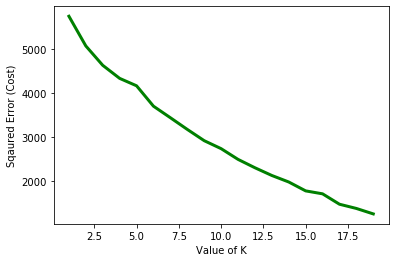

In [49]:
# Now lets find optimal value of K for best clustering

from sklearn.cluster import KMeans  # importing kmeans clustering
import matplotlib.pyplot as plt 

cost =[] 
for i in range(1, 20): 
    KM = KMeans(init = "k-means++", n_clusters = i, max_iter = 100) 
    KM.fit(blr_apt_clustering_input) 
      
# calculates squared error 
# for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()


For the graph above we can see that the optimal has not yet converged

As as data science product owner we not have a challenge of trade off between finding optimal clusters and restricting the clusters so as to make the end user's (consumer of our service/application) life easy and to peak their interest. 

In order to play the balancing act between usability and accuracy, we will use the value of 12 cluster based on the above graph - Here, the number of clusters are moderate (not too few or not too many) and that has an acceptable error

In [50]:
# Clustering the date into 12 clusters

KM = KMeans(init = "k-means++", n_clusters = 12, max_iter = 100) 
KM.fit(blr_apt_clustering_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
KM.labels_[0:10] 

array([7, 4, 0, 0, 0, 0, 0, 0, 8, 0], dtype=int32)

In [56]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted_clust = neighborhoods_venues_sorted
neighborhoods_venues_sorted_clust = neighborhoods_venues_sorted_clust.insert(1, 'Cluster Labels', KM.labels_)
neighborhoods_venues_sorted_clust.to_csv('neighborhoods_venues_sorted_clust.csv',index=False)
neighborhoods_venues_sorted_clust.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,7,Indian Restaurant,Dessert Shop,Lounge,Multiplex,Coffee Shop,Café,Brewery,Donut Shop,Juice Bar,Clothing Store
1,Agara,4,Indian Restaurant,Pizza Place,Ice Cream Shop,Italian Restaurant,Chinese Restaurant,Café,Bike Shop,Indie Movie Theater,Food Truck,Japanese Restaurant
2,Anekal,0,ATM,Indian Restaurant,Camera Store,Movie Theater,Business Service,Farm,Cosmetics Shop,Creperie,Department Store,Dessert Shop
3,Attibele,0,ATM,Bakery,Indian Restaurant,South Indian Restaurant,Castle,Antique Shop,Art Gallery,Cosmetics Shop,Creperie,Department Store
4,Bagalur,0,Memorial Site,Food Truck,Farm,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop,Dhaba


In [57]:
df_apt_geo_add_nbh_final = pd.read_csv('df_apt_geo_add_nbh_final')
df_apt_geo_add_nbh_final.shape

(920, 9)

In [58]:
# Writing a logic to create a new df, by adding cluster and sorted venue information into "df_apt_geo_add_nbh_final"
import re
blr_apt_nbh_cluster_ven = df_apt_geo_add_nbh_final
blr_apt_nbh_cluster_ven.insert(9, 'Cluster Labels', '', True)
blr_apt_nbh_cluster_ven.insert(10, '1st Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(11, '2nd Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(12, '3rd Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(13, '4th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(14, '5th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(15, '6th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(16, '7th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(17, '8th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(18, '9th Most Common Venue', '', True)
blr_apt_nbh_cluster_ven.insert(19, '10th Most Common Venue', '', True)


for i in neighborhoods_venues_sorted_clust.index:
    for a in blr_apt_nbh_cluster_ven.index:
        x = re.findall(neighborhoods_venues_sorted_clust['Neighborhood'][i],blr_apt_nbh_cluster_ven['Neighborhood'][a])
        if len(x) > 0:
            blr_apt_nbh_cluster_ven['Cluster Labels'][a] = neighborhoods_venues_sorted_clust['Cluster Labels'][i]
            blr_apt_nbh_cluster_ven['1st Most Common Venue'][a] = neighborhoods_venues_sorted_clust['1st Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['2nd Most Common Venue'][a] = neighborhoods_venues_sorted_clust['2nd Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['3rd Most Common Venue'][a] = neighborhoods_venues_sorted_clust['3rd Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['4th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['4th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['5th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['5th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['6th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['6th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['7th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['7th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['8th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['8th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['9th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['9th Most Common Venue'][i]
            blr_apt_nbh_cluster_ven['10th Most Common Venue'][a] = neighborhoods_venues_sorted_clust['10th Most Common Venue'][i]
            
            
        
     #   print(i,a)

blr_apt_nbh_cluster_ven.to_csv('blr_apt_nbh_cluster_ven.csv', index=False)

#blr_apt_nbh_cluster_ven = pd.read_csv ('blr_apt_nbh_cluster_ven.csv')
blr_apt_nbh_cluster_ven.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/p

,names,lat,lon,geometry,Cordinated,Address,Neighborhood,Nbh_lat,Nbh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Purva Skydale bangalore,12.894033,77.662362,POINT (77.66236169999999 12.894033),"12.894033,77.66236169999998","Purva Skydale Apartments, Singasandra, Bommana...",Singasandra,12.685041,77.697563,,,,,,,,,,,
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone...",Bommanahalli,12.903000,77.624200,8,Indian Restaurant,Hotel Pool,Auto Garage,Hotel Bar,Department Store,Cafeteria,Tea Room,Pizza Place,Grocery Store,Dry Cleaner
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu...",Anekal,12.708637,77.699397,0,ATM,Indian Restaurant,Camera Store,Movie Theater,Business Service,Farm,Cosmetics Shop,Creperie,Department Store,Dessert Shop
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn...",Kannur,11.946689,75.353877,0,Indian Restaurant,Fast Food Restaurant,Yoga Studio,Farm,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal...",Mahadevapura,12.988000,77.689500,1,Coffee Shop,Sandwich Place,Bus Station,Indian Restaurant,Multiplex,Brewery,Kerala Restaurant,Fast Food Restaurant,Cafeteria,BBQ Joint


In [59]:
blr_apt_nbh_cluster_ven.shape

(920, 20)

We can see that some of the Neighborhood do not have the venue details, this is because as discussed earlier - we do not have any information on those venues that is coming from ForeSquare API

In [60]:
# Cleaning up the data to remove rows where clustering data is not available for neighborhood
blr_apt_nbh_cluster_ven_clean = blr_apt_nbh_cluster_ven[blr_apt_nbh_cluster_ven['Cluster Labels'] != '']
blr_apt_nbh_cluster_ven_clean.to_csv('blr_apt_nbh_cluster_ven_clean.csv',index=False)
blr_apt_nbh_cluster_ven_clean.head()

,names,lat,lon,geometry,Cordinated,Address,Neighborhood,Nbh_lat,Nbh_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Salarpuria Sattva Cadenza bangalore,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone...",Bommanahalli,12.903000,77.624200,8,Indian Restaurant,Hotel Pool,Auto Garage,Hotel Bar,Department Store,Cafeteria,Tea Room,Pizza Place,Grocery Store,Dry Cleaner
2,Shriram Summitt bangalore,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu...",Anekal,12.708637,77.699397,0,ATM,Indian Restaurant,Camera Store,Movie Theater,Business Service,Farm,Cosmetics Shop,Creperie,Department Store,Dessert Shop
3,Shriram Luxor bangalore,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn...",Kannur,11.946689,75.353877,0,Indian Restaurant,Fast Food Restaurant,Yoga Studio,Farm,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop
4,Ecolife Elements Of Nature bangalore,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal...",Mahadevapura,12.988000,77.689500,1,Coffee Shop,Sandwich Place,Bus Station,Indian Restaurant,Multiplex,Brewery,Kerala Restaurant,Fast Food Restaurant,Cafeteria,BBQ Joint
5,Salarpuria Sattva East Crest bangalore,13.043223,77.748241,POINT (77.7482414 13.043223),"13.043223,77.74824140000001","Salarpuria East Crest Apartments, Old Madras R...",Virgonagar,13.033117,77.734857,0,University,Breakfast Spot,Lake,Yoga Studio,Farm,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop


In [61]:
blr_apt_nbh_cluster_ven_clean = pd.read_csv('blr_apt_nbh_cluster_ven_clean.csv')
blr_apt_nbh_cluster_ven_clean.shape

(843, 20)

In [62]:
# create map of Bangalore for clustering the neighborhood 

lat = 12.97
long = 77.59
blr_clust_map = folium.Map(location = [lat,long], zoom_start=10)
kclusters = 12
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_apt_nbh_cluster_ven_clean['Nbh_lat'], blr_apt_nbh_cluster_ven_clean['Nbh_lon'], blr_apt_nbh_cluster_ven_clean['Neighborhood'], blr_apt_nbh_cluster_ven_clean['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(blr_clust_map)
       
blr_clust_map

In [63]:
df_blr_apt.head()

,names,Price,Area,Unit Type
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment


In [64]:
df_blr_apt_merg = df_blr_apt
df_blr_apt_merg['Apartment Details'] = df_blr_apt_merg['Unit Type'].map(str) +' : ' + df_blr_apt_merg['Area'].map(str) +' : ' + df_blr_apt_merg['Price'].map(str)
df_blr_apt_merg.head()

,names,Price,Area,Unit Type,Apartment Details
0,Salarpuria Sattva Cadenza,39 L -41.65 L,755 sq.ft,1 BHK Apartment,1 BHK Apartment : 755 sq.ft : 39 L -41.65 L
1,Salarpuria Sattva Cadenza,55 L -75 L,1175-1275 sq.ft,2 BHK Apartment,2 BHK Apartment : 1175-1275 sq.ft : 55 L -75 L
2,Salarpuria Sattva Cadenza,70.04 L -73.30 L,1335-1340 sq.ft,2.5 BHK Apartment,2.5 BHK Apartment : 1335-1340 sq.ft : 70.04 L ...
3,Salarpuria Sattva Cadenza,65 L -95 L,1365-1595 sq.ft,3 BHK Apartment,3 BHK Apartment : 1365-1595 sq.ft : 65 L -95 L
4,Purva Skydale,76.25 L -1.75 Cr,1273-1371 sq.ft,2 BHK Apartment,2 BHK Apartment : 1273-1371 sq.ft : 76.25 L -1...


In [65]:
df_blr_apt_merg.shape

(2660, 5)

In [66]:
blr_apt_nbh_cluster_ven_clean.shape

(843, 20)

In [67]:
df_blr_apt_merg_dtls = df_blr_apt_merg.groupby('names').agg({'Apartment Details':'||'.join}).reset_index()
df_blr_apt_merg_dtls.head()

,names,Apartment Details
0,42 Queens Square,3 BHK Apartment : 1691-2170 sq.ft : 78 L -1.56...
1,A Peace Paramount,2 BHK Apartment : 1100-1177 sq.ft : 41.78 L -4...
2,AR Splendor Park,2 BHK Apartment : 1146-1253 sq.ft : 40.11 L -4...
3,ARS Bhavisha,2 BHK Apartment : 1000-1260 sq.ft : 51 L -65 L...
4,ATZ Estrella,2 BHK Apartment : 1105 sq.ft : nan||3 BHK Apar...


In [68]:
df_blr_apt_merg_dtls.shape

(997, 2)

In [69]:
df_blr_apt_merg_dtls.shape

(997, 2)

In [70]:
# Now joining the data frame with apartment details with bangalore clustered neighborhood data frame
df_blr_apt_details = blr_apt_nbh_cluster_ven_clean # copying clustering data frame into new data frame
df_blr_apt_details.insert(1, 'Apt_Name', '', True)
df_blr_apt_details.insert(2, 'Apt_Dtls', '', True)


for i in df_blr_apt_merg_dtls.index:
    for a in df_blr_apt_details.index:
        x = re.findall(df_blr_apt_merg_dtls['names'][i],df_blr_apt_details['names'][a])
        if len(x) > 0:
            df_blr_apt_details['Apt_Name'][a] = df_blr_apt_merg_dtls['names'][i]
            df_blr_apt_details['Apt_Dtls'][a] = df_blr_apt_merg_dtls['Apartment Details'][i]
                       
        
     #   print(i,a)

df_blr_apt_details.to_csv('df_blr_apt_details.csv', index=False)

#df_blr_apt_details = pd.read_csv ('df_blr_apt_details.csv')
df_blr_apt_details.head(5)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,names,Apt_Name,Apt_Dtls,lat,lon,geometry,Cordinated,Address,Neighborhood,Nbh_lat,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Salarpuria Sattva Cadenza bangalore,Salarpuria Sattva Cadenza,1 BHK Apartment : 755 sq.ft : 39 L -41.65 L||2...,12.889441,77.640221,POINT (77.64022109999999 12.889441),"12.889441,77.64022109999998","Kudlu Road, Mangammanapalya, Bommanahalli Zone...",Bommanahalli,12.903000,...,Indian Restaurant,Hotel Pool,Auto Garage,Hotel Bar,Department Store,Cafeteria,Tea Room,Pizza Place,Grocery Store,Dry Cleaner
1,Shriram Summitt bangalore,Shriram Summitt,1 BHK Apartment : 714 sq.ft : 41.76 L -54 L||2...,12.836068,77.667242,POINT (77.6672418 12.8360678),"12.836067800000002,77.6672418","Hebbagodi, Electronics City Phase 2 (West), Hu...",Anekal,12.708637,...,ATM,Indian Restaurant,Camera Store,Movie Theater,Business Service,Farm,Cosmetics Shop,Creperie,Department Store,Dessert Shop
2,Shriram Luxor bangalore,Shriram Luxor,2 BHK Apartment : 1195 sq.ft : 56.64 L -80.06 ...,13.085249,77.654915,POINT (77.65491539999999 13.085249),"13.085249000000001,77.65491540000001","Kannuru, Bangalore East, Bangalore Urban, Karn...",Kannur,11.946689,...,Indian Restaurant,Fast Food Restaurant,Yoga Studio,Farm,Coffee Shop,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop
3,Ecolife Elements Of Nature bangalore,Ecolife Elements Of Nature,1 BHK Apartment : 651 sq.ft : 33 L||2 BHK Apar...,12.938728,77.731126,POINT (77.73112619999999 12.9387277),"12.9387277,77.73112619999998","Varthuru, Mahadevapura Zone, Bengaluru, Bangal...",Mahadevapura,12.988000,...,Coffee Shop,Sandwich Place,Bus Station,Indian Restaurant,Multiplex,Brewery,Kerala Restaurant,Fast Food Restaurant,Cafeteria,BBQ Joint
4,Salarpuria Sattva East Crest bangalore,Salarpuria Sattva East Crest,1 BHK Apartment : 598 sq.ft : 29.84 L -39.47 L...,13.043223,77.748241,POINT (77.7482414 13.043223),"13.043223,77.74824140000001","Salarpuria East Crest Apartments, Old Madras R...",Virgonagar,13.033117,...,University,Breakfast Spot,Lake,Yoga Studio,Farm,Convenience Store,Cosmetics Shop,Creperie,Department Store,Dessert Shop


In [111]:
#Grouping by neighborhood to find count of appartments in that neighborhood
df_blr_apt_dtls_grp = df_blr_apt_details

df_blr_apt_dtls_nbh_grp = df_blr_apt_dtls_grp.groupby('Neighborhood').count().reset_index()
df_blr_apt_dtls_nbh_grp.head()

,Neighborhood,names,Apt_Name,Apt_Dtls,lat,lon,geometry,Cordinated,Address,Nbh_lat,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Agara,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,Anekal,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
3,Attibele,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,Bagalur,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


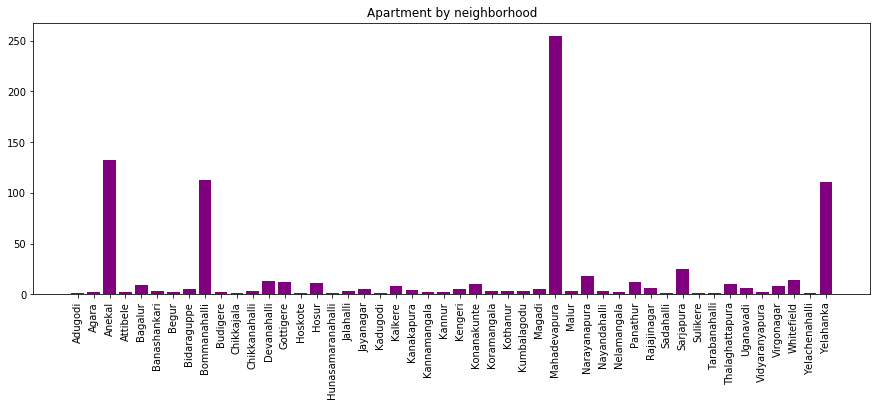

In [126]:
# Plotting number of appartments in each neighborhood

fig = plt.subplots(figsize = (15,5))
x = df_blr_apt_dtls_nbh_grp['Neighborhood']
y = df_blr_apt_dtls_nbh_grp['Apt_Name']

plt.bar(x,y, color = 'Purple')
plt.xticks(rotation = 90)
plt.title('Apartment by neighborhood')

plt.show()


In [127]:
# create map of Bangalore for color coding the apartments based on clustering and providing apartment details 
lat = 12.97
long = 77.59
blr_apt_dtls_map = folium.Map(location = [lat,long], zoom_start=10)
kclusters = 12
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, apt, dtls in zip(df_blr_apt_details['lat'], df_blr_apt_details['lon'], df_blr_apt_details['Neighborhood'], df_blr_apt_details['Cluster Labels'], df_blr_apt_details['Apt_Name'],df_blr_apt_details['Apt_Dtls']):
    label = folium.Popup(str(apt) + '||' + str(poi) + '||' + str(dtls) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(blr_apt_dtls_map)
       
blr_apt_dtls_map